In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt 
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from CD_control_optimization.optimization_sweeps import OptimizationSweeps
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.1



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10917608548049016446, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4720024909139823836
 physical_device_desc: "device: XLA_CPU device"]

In [2]:
#first, the optimization options.
N = 40 #hilbert space size
fock = 4 #desired fock
params = {
'N_blocks' : 8, #number of blocks in circuit
'N_multistart' : 200, #number of optimizations to run in parallel
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.999, #terminal fidelitiy
'use_displacements' : False, #use D operators in optimization
'no_CD_end' : False, #set final CD = 0
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'alpha_scale' : 0.5, #maximum |alpha| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))],
'target_states' : [qt.tensor(qt.basis(2,1), qt.basis(N,fock))], #end qubit in e since last CD won't have pi pulse.
'name' : 'fock creation', #name for printing and saving
'filename' : None, 
#if no filename specified, will be saved in this folder with default name #"name.h5" 
'fock' : fock, #note: can pass arbitrary parameters, will be saved
}


In [3]:
#create optimization object. 
#Note that initial params will be randomized upon creation
opt = BatchOptimizer(**params)

In [27]:
#print current info. 
opt.print_info()

optimization_type: state transfer
N_multistart: 200
N_blocks: 8
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: fock creation
comment: 
fock: 4
N_cav: 40
filename: fock creation.h5

Best circuit parameters found:
betas:         [ 0.19185-2.17201j  0.27278+0.03928j -2.7571 -0.94123j -1.73594+1.70713j
  0.80528+1.3377j   0.78654+0.36198j  0.35006+0.31909j  1.88837+0.65767j]
alphas:        [0.+0.j]
phis (deg):    [   0.       143.07079 -126.24087  105.99143 -151.59415  162.99269
  167.97914   91.23098]
thetas (deg):  [138.88924  56.91874 -46.58215  33.73574  -3.8463  144.20782  72.08255
  58.38201]
Max Fidelity:  0.237745




In [28]:
#run optimizer.
opt.optimize()
#note that every time an optimizer is run, it will add to the same .h5 file in the filename, saving the data with a new timestamp

Start time: 2021-01-29 22:37:35
 Epoch: 40 / 200 Max Fid: 0.991786 Avg Fid: 0.880031 Max dFid: 0.024144 Avg dFid: 0.000950 Elapsed time: 0:08:02.376842 Remaing time: 0:32:09.507366

KeyboardInterrupt: 

In [29]:
#now, we can analyze the results.
#note that all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I would recommend using "HDFview" software to understand data structure
filename = opt.filename
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

N_blocks: 8
N_cav: 40
N_multistart: 200
alpha_scale: 0.5
beta_scale: 3.0
comment: 
dfid_stop: 1e-06
elapsed_time_s: 482.376841545105
epoch_size: 10
epochs: 200
fock: 4
learning_rate: 0.01
name: fock creation
no_CD_end: False
optimization_type: state transfer
term_fid: 0.999
termination_reason: outside termination
use_displacements: False
filename: fock creation.h5

Best circuit parameters found:
betas:         [ 0.10933-1.71749j  0.96845-0.85034j  0.61329+0.11182j -1.46065-1.59104j
  1.06724-0.55702j  0.05857-1.25991j -0.40558-0.13784j -0.00995-0.26391j]
alphas:        [0.+0.j]
phis (deg):    [   0.       -93.15827   66.50327 -100.8222   -39.98256 -154.54016
  -30.55317  127.26764]
thetas (deg):  [-99.59685 -61.67231  48.23305 140.89447 -68.2805  119.29798 104.21996
  87.42463]
Max Fidelity:  0.991786




In [30]:
#saving the pulse for the experiment
bc = opt.best_circuit()
print(bc)
betas, alphas, phis, thetas = bc['betas'], bc['alphas'], bc['phis'], bc['thetas']
fname = r'Z:\Data\Tennessee2020\20201201_cooldown\conditional_displacement_circuits\20210129_fock' + '%d' % fock + '.npz'
print(fname)
np.savez(fname, betas=betas, phis=phis, thetas=thetas)

{'fidelity': 0.99179703, 'betas': array([ 0.1099152 -1.7177722j ,  0.96796066-0.8499498j ,
        0.613107  +0.11181463j, -1.4605947 -1.590721j  ,
        1.0671736 -0.55711854j,  0.05852412-1.259923j  ,
       -0.40556633-0.13784054j, -0.00981001-0.2628354j ], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.        , -1.6255057 ,  1.1624987 , -1.7585033 , -0.70222926,
       -2.6916957 , -0.5383246 ,  2.225877  ], dtype=float32), 'thetas': array([-1.7375265 , -1.0761409 ,  0.84199977,  2.4579718 , -1.1915473 ,
        2.0821698 ,  1.8190081 ,  1.526017  ], dtype=float32)}
Z:\Data\Tennessee2020\20201201_cooldown\conditional_displacement_circuits\20210129_fock4.npz


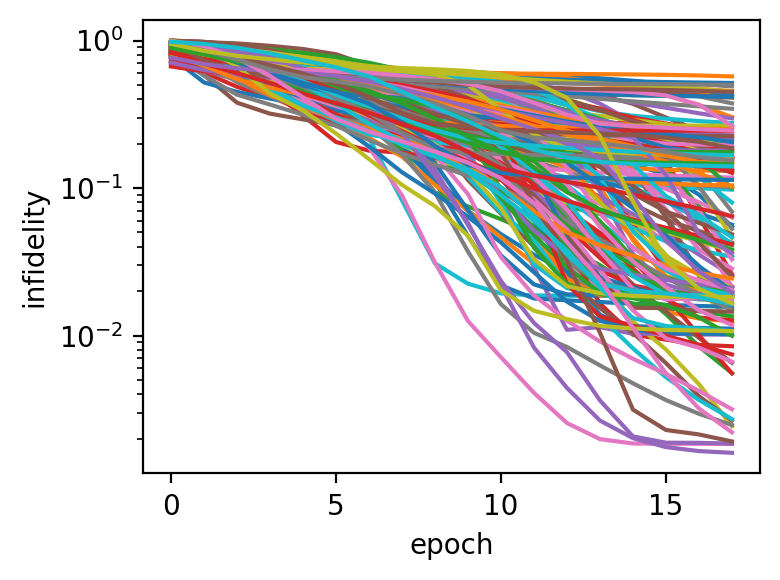

In [17]:
#We can plot the trajectories of the different parallel optimizations
analysis.plot_fidelities()

In [8]:
#We can also load the best circuit, states, and other parameters (see OptimizationAnalysis class)
best_circuit = analysis.best_circuit()
print(best_circuit)
target_state = analysis.target_state()
print(target_state)

{'fidelity': 0.99593514, 'betas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'alphas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'phis': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64), 'thetas': array([ 3.2117655 +1.2233323j , -0.8165957 -0.73543257j,
        0.19942887-0.20403528j,  0.4095894 -1.1010613j ,
       -0.03973835-0.679881j  , -0.300295  +0.36514387j], dtype=complex64)}
Quantum object: dims = [[2, 50], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[ 1.16083086e-01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.46249408e-01+3.28332

In [ ]:
#Now, using the same opt object, we can sweep the number of blocks in the optimization.
sweeper = OptimizationSweeps(opt_object=opt)
sweeper.N_blocks_sweep(min_N_blocks=3, max_N_blocks=6, terminate=True) #"terminate" option specifies if it terminates sweep when term fid is met

In [ ]:
#the sweep data will be nicely saved to the same h5 file. We can analyze the sweep with the sweep analysis class.
sweep_analysis = OptimizationSweepsAnalysis(filename=filename)
sweep_analysis.sweep_names #names of the sweeps it found in the file

In [ ]:
#we can analyze how the best fidelity found depends on the sweep parameter
sweep_analysis.plot_sweep_fidelities(log=False)

In [ ]:
#there are a few other things we can plot. Better data analysis coming soon.
analysis.plot_mag_betas()

In [ ]:
analysis.plot_phase_betas()

In [ ]:
analysis.plot_mag_alphas()

In [ ]:
analysis.plot_phase_alphas()

In [ ]:
analysis.plot_average_magnitude_alpha()

In [ ]:
analysis.plot_average_magnitude_beta()

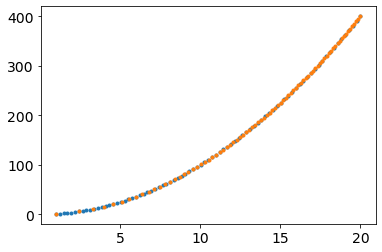

In [15]:
xs = np.linspace(1,20,81)
plt.plot(xs, xs**2, '.')
xs2 = np.sqrt(np.linspace(xs[0]**2, xs[-1]**2, len(xs)))
plt.plot(xs2, xs2**2, '.')